# 1

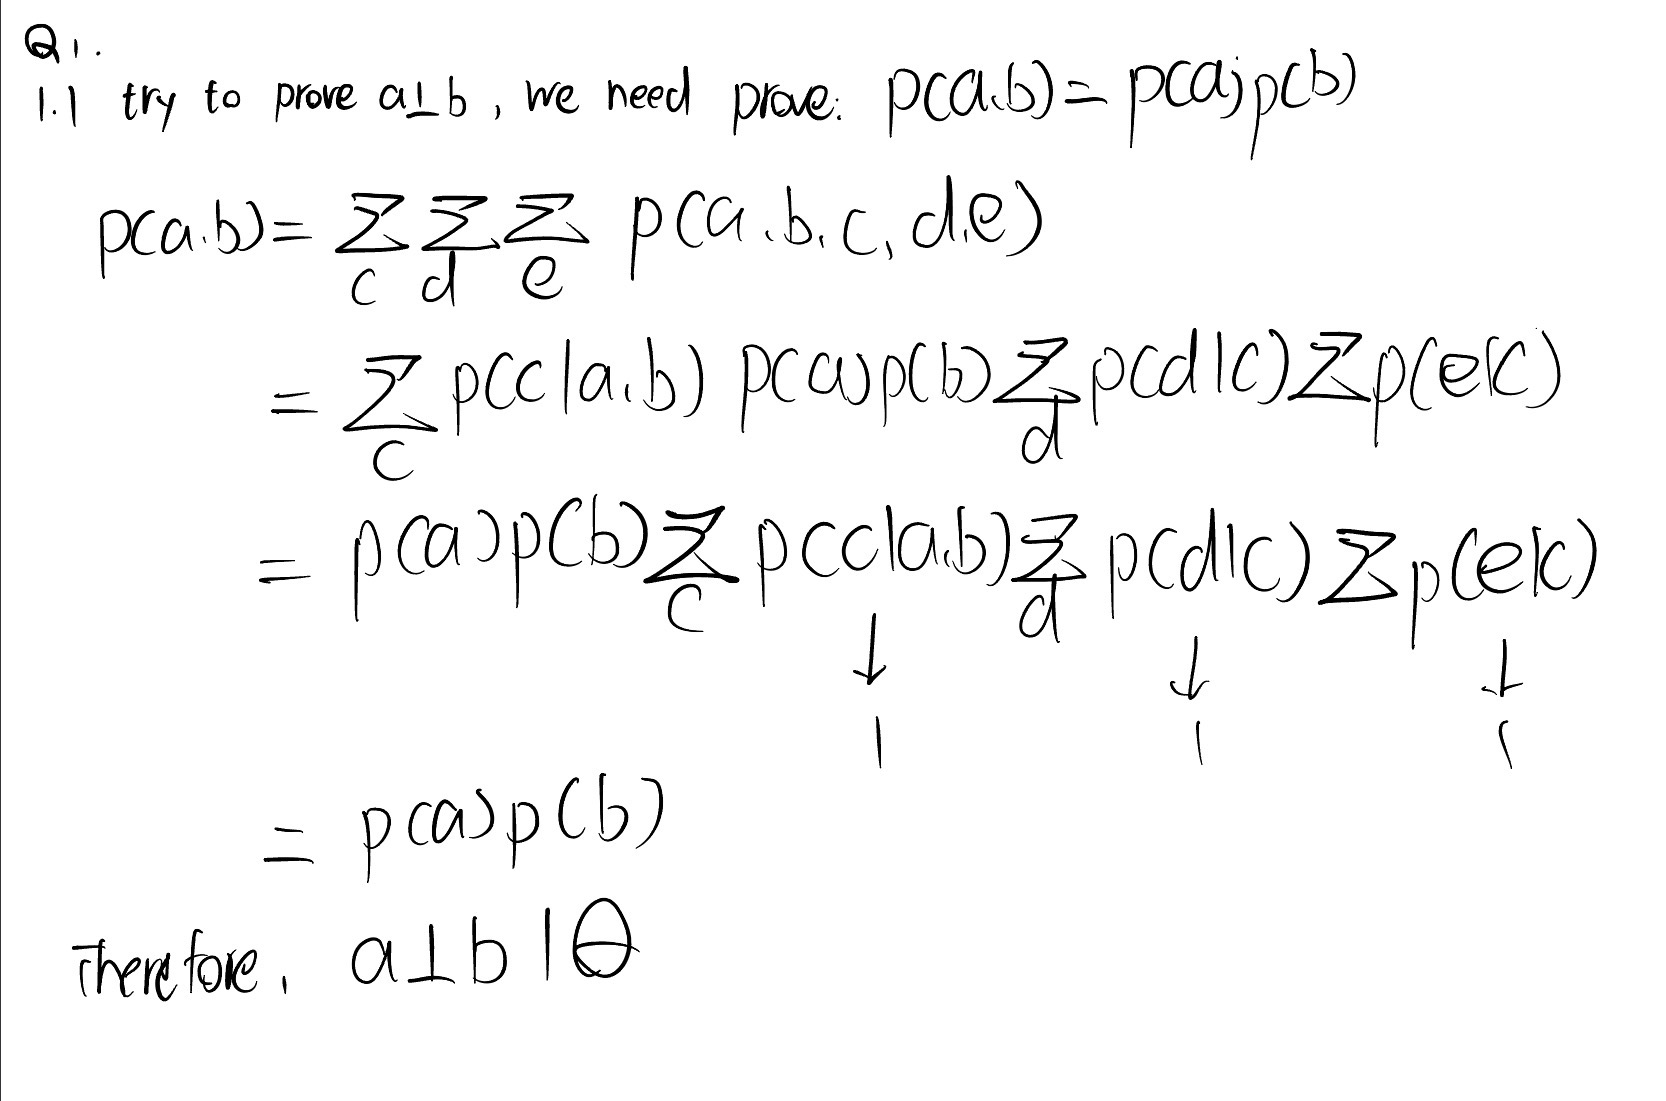

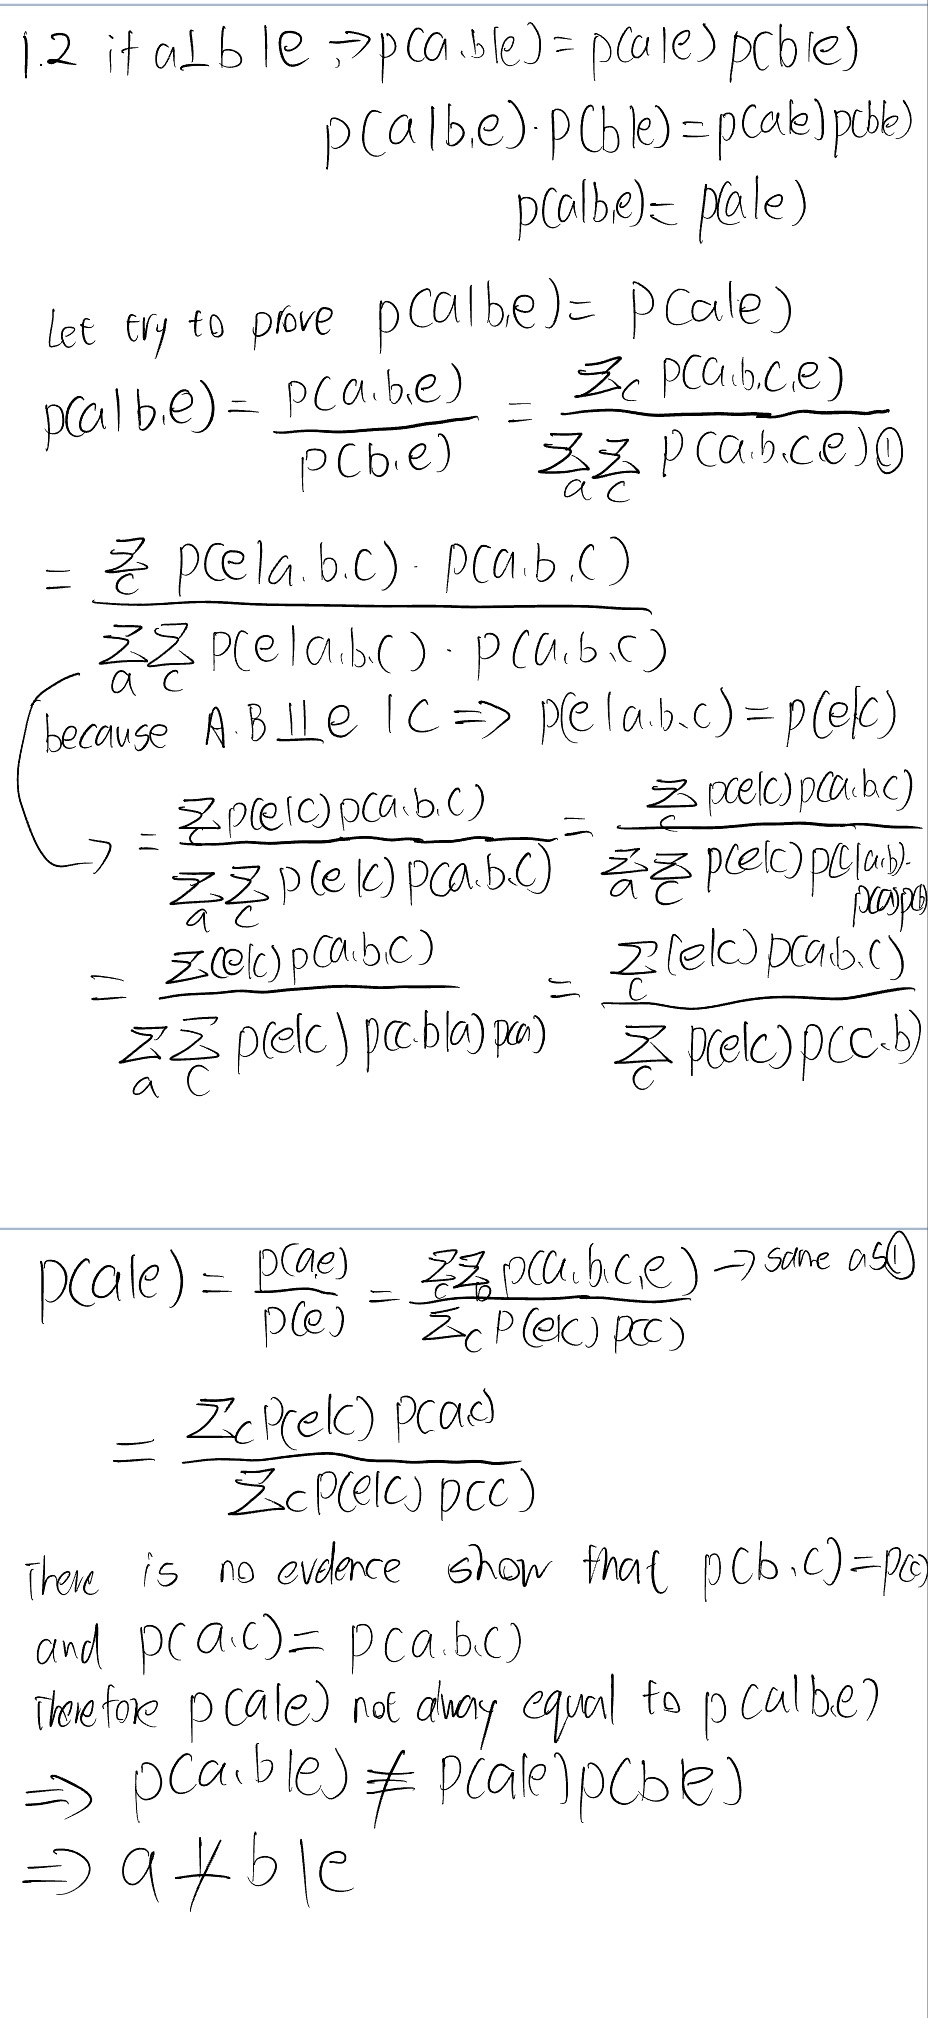

# 2
This model assumes conditional independence, expressed as $b$ being independent of $c$ given $a$ (i.e., $b \perp c \mid a$), which means that the joint probability of $b$ and $c$ given $a$ can be factorized into the product of the probability of $b$ given $a$ and the probability of $c$ given $a$. Consequently, the joint distribution of $a$, $b$, and $c$ in this model is given by $p(a, b, c) = p(b\mid a)p(c\mid a)p(a)$.

However, the same joint distribution $p(a, b, c)$ can be alternatively modeled in various ways. For instance, it can be expressed as:

\begin{align*}
p(a, b, c) &= p(a \mid b, c)p(b \mid c)p(c) \
&= p(b \mid a, c)p(a \mid c)p(c) \
&= p(c \mid a, b)p(a \mid b)p(b) 
\end{align*}

Therefore, the condition required by the proposed graph does not necessarily hold.

# 3

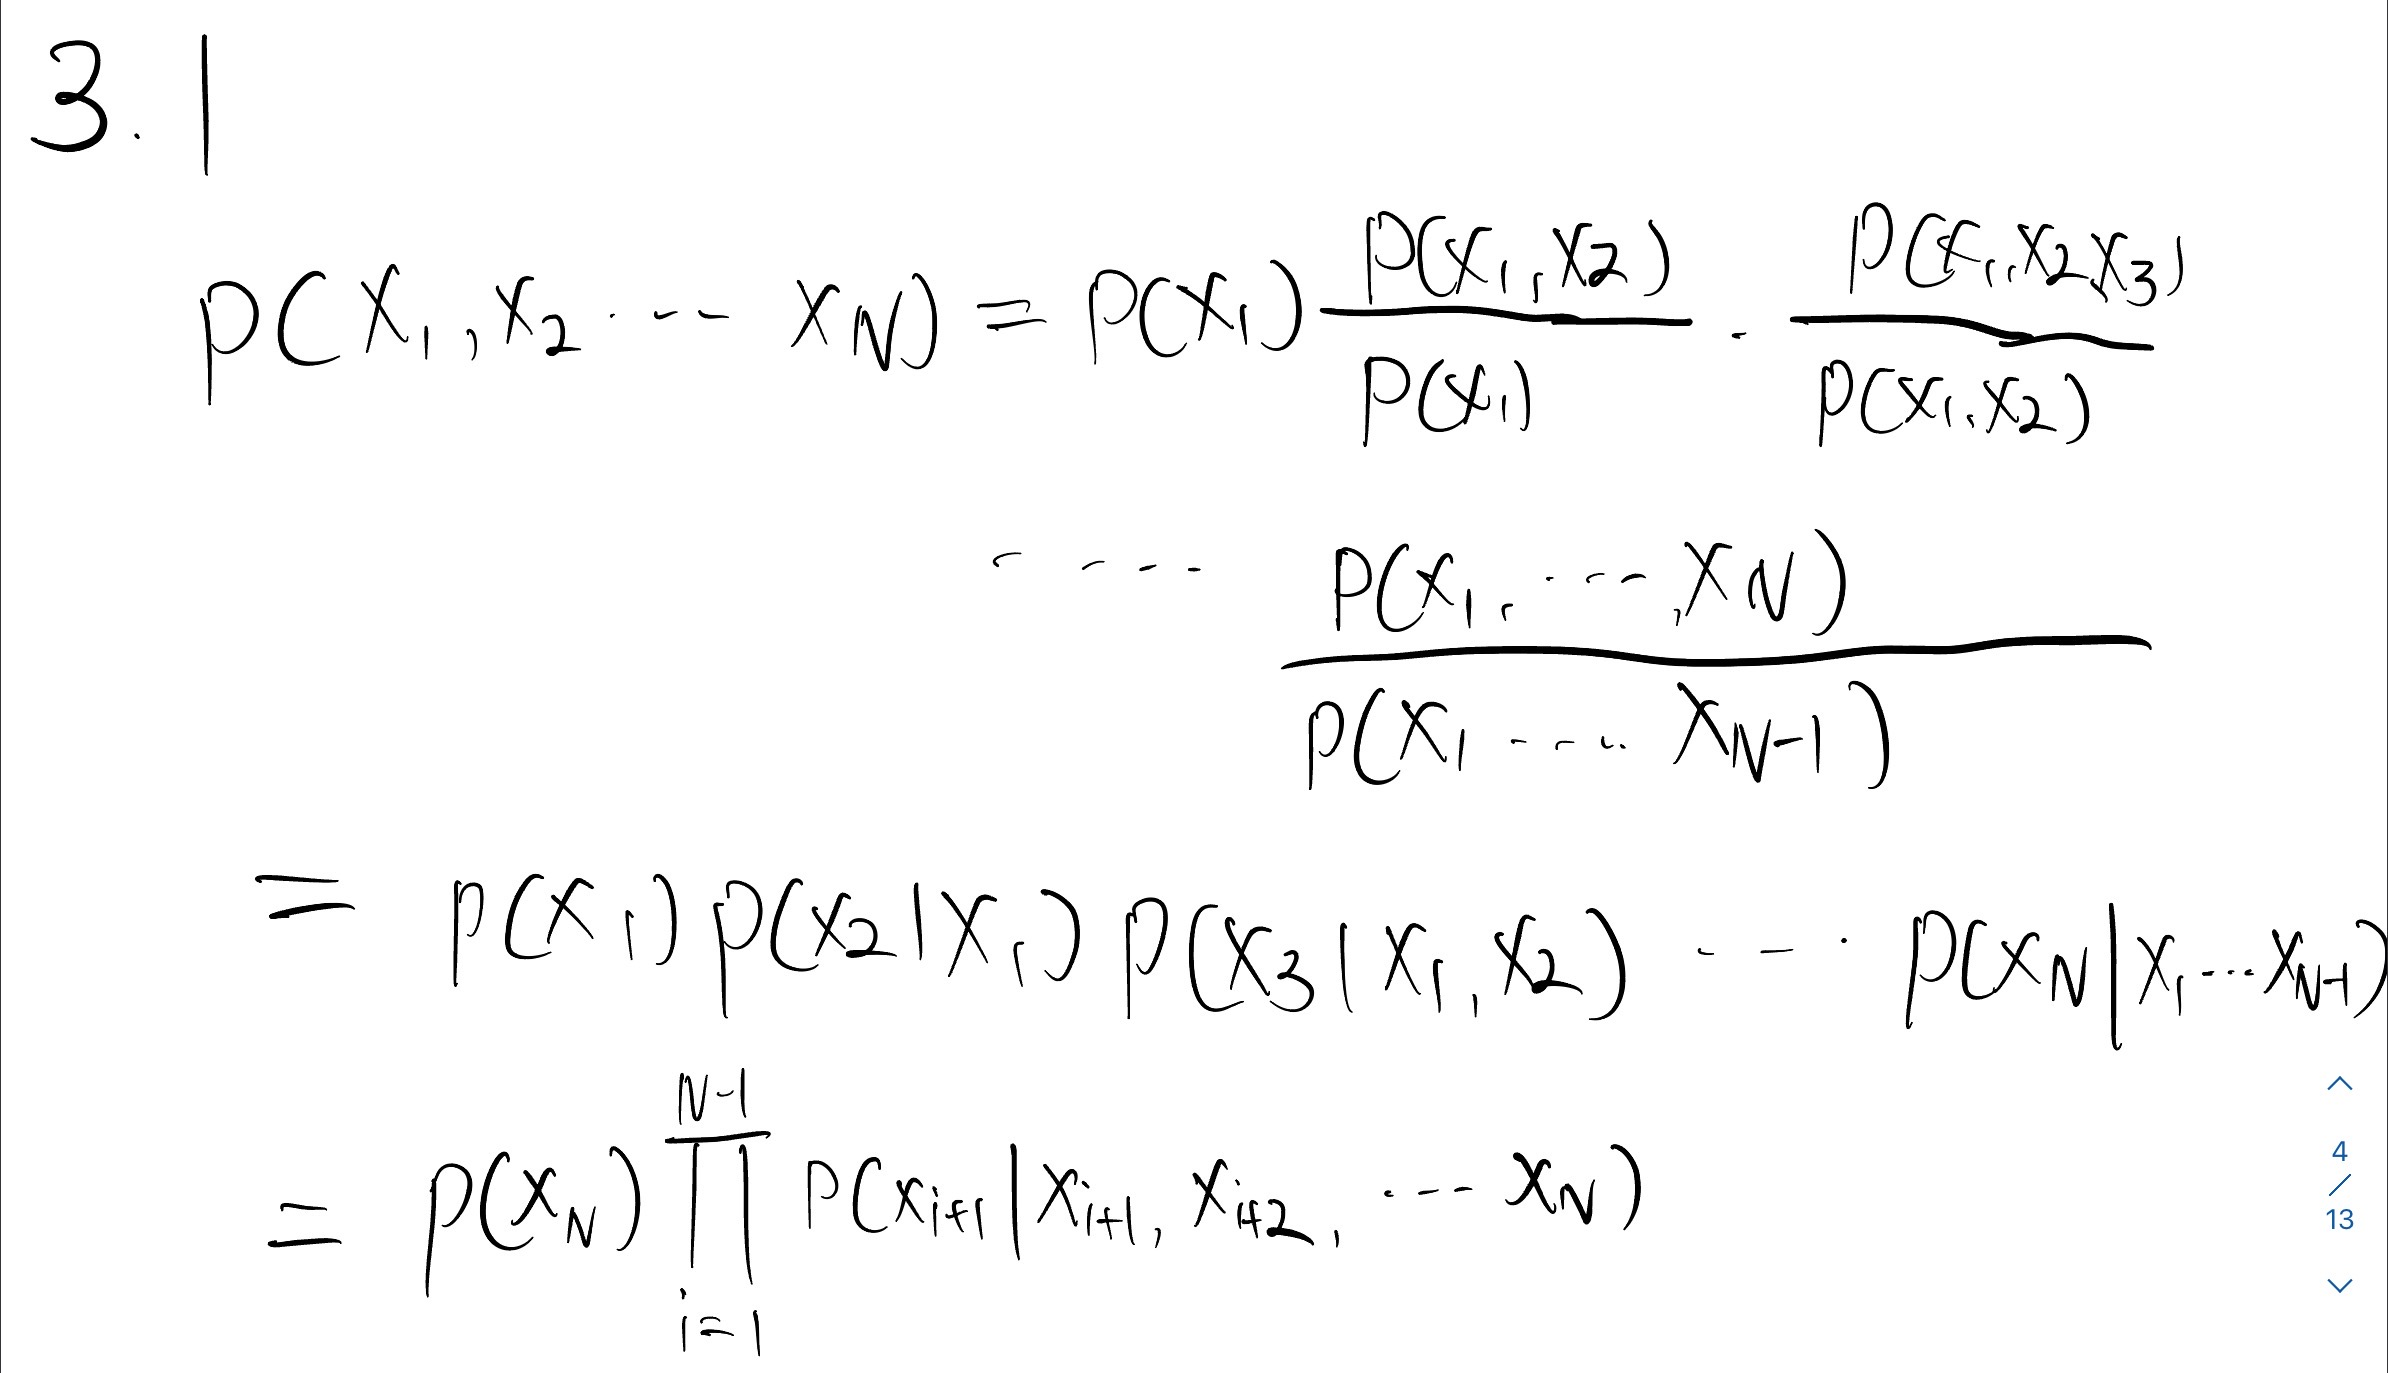

## 3.2
This question is inquiring about the number of possible arrangements that can be formed from a set of $N$ elements, where each element can take on one of $K$ distinct states. Therefore,there are $K^N-1$ parameters Likewise, we can expand on the formula derived in the previous question, which is $p(x_N) \cdot \prod_{i=1}^{N-1} p(x_i \mid x_{i+1}, x_{i+2}, \dots, x_N)$. It is known that $x_N$ requires $(K-1)$ parameters to be represented, while a node with $i$ parents requires $K^i$ parameters to be represented.$sum_{i=1}^{N} (K-1)(K^{N-i}) = K^N-1$,Therefore,big-o is $O(K^N)$.

## 3.3
The $m$ root nodes are connected directly to the rest of the network and require $K-1$ probabilities to specify the distribution over their $K$ possible states, except for the last one, which can be derived from the others. Thus, the total number of parameters needed for the root nodes is $m(K-1)$.

The remaining $N-m$ leaf nodes are connected only to the root nodes and require $K-1$ probabilities to specify the distribution over their $K$ possible states. Moreover, each leaf node has $m$ parent nodes, one for each root, and thus we need $K^m$ probabilities to specify the distribution over all possible combinations of states for its $m$ parent nodes. Consequently, the total number of parameters needed for all the leaf nodes is $(N-m)(K-1) + mK^m$.

In conclusion, the total number of parameters required to define the Bayesian network structure is given by $m(K-1) + (N-m)(K-1) + mK^m$.

## 3.4
The formula of noisy-OR is $p(x_i \mid \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) \prod_{j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j}$.For each leaf node, we need $K-1$ parameters. Each parent node needs $m^{k-1}$ parameters, as it has $k$ states, but since we only need a single parent at a time, we don't need another new parameter for the last state, so we only need $k-1$ parameters. In addition, we need one more parameter for the leak node $\mu_{i0}$ for each leaf node.Therefore, the total number of parameters is $m(K-1) + (N-m)(K-1)(m^{K-1} + 1)= m + (N-m)(m + 1)$

# 4

## 4.1
At least one parent node $x_j$ must have a value of $1$, otherwise the conditional probability $p(x_i = 1 \mid \textrm{pa}(x_i))$ would be very close to $0$ due to the expression $1 - (1 - \mu_{i0}) \cdot \prod_{j \in \textrm{pa}(x_i)} (1 - \mu_{ij})^0$. In fact, if we disregard the leak node, $p(x_i = 1 \mid \textrm{pa}(x_i))$ would be exactly $0$. Therefore, we can conclude that there must be at least one parent node $x_j$ with a value of $1$.In other words, having one parent node $x_j$ with a high value of $\mu_{ij}$, which represents the probability of $x_i$ being $1$ given that $x_j$ is $1$, will result in a low value of $1 - \mu_{ij}$. This will ultimately increase the overall value of $p(x_i = 1 \mid \textrm{pa}(x_i))$, which behaves similarly to an OR gate. Essentially, only one parent node needs to have a value of $1$ to make $p(x_i = 1 \mid \textrm{pa}(x_i))$ equal to $1$, just like in an OR gate. However, this is considered a "soft" version of the OR gate because the value of $p(x_i = 1 \mid \textrm{pa}(x_i))$ will only be close to $1$, not exactly $1$.

## 4.2
By assigning a value to each $\mu_{i0}$, we can calculate $p(x_i \mid \textrm{pa}({x_i}))$, even if all the parents of $x_i$ are zeros:

\begin{align*}
p(x_i \mid \textrm{pa}({x_i})) &= 1 - (1 - \mu_{i0}) \prod_{j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j} \
&= 1 - (1 - \mu_{i0}) \prod_{j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^0 \
&= \mu_{i0}
\end{align*}
In contrast, Henrion considered that prior will affect the output of all modeled variables, and therefore $p(x_i \mid \textrm{pa}({x_i}))$ is calculated as $1 - (1 - \mu_{i0}) \prod_{j \in \textrm{pa}(x_i)}(\frac{1 - \mu_{ij}}{1 - \mu_{i0}})^{x_j}$, where the $(1 - \mu_{i0})$ term is part of every $\mu_{ij}$ output.

## 4.3
The sigmoid function has a more general applicability than the noisy-OR function because noisy-OR function is a discrete function that outputs a binary value, whereas the sigmoid function is a continuous function that outputs a real value between 0 and 1.it can handle negative weights for $W_{ij}$, whereas noisy-OR cannot.While the weight limitation issue of noisy-OR means that sigmoid can compute unique functions that noisy-OR cannot, it is important to note that for models that require extreme probabilities.the sigmoid function may not be suitable, as it may require extremely large negative or positive weights to bring $\sigma(z)$ to 0 or 1. This can be problematic if a model is based on the assumption of noisy-OR, as there may be cases where noisy-OR works but sigmoid does not. In such cases, the probability output of the model is exactly like the prediction of noisy-OR. As a result, the two functions can compute different functions, and the choice of which function to use depends on the specific problem being solved.

## 4.4
Noisy-OR example:
Consider a medical diagnosis problem, where we want to predict whether a patient has a certain disease based on the presence or absence of a set of symptoms. However, some symptoms may be caused by different underlying conditions, and may not necessarily be indicative of the disease we're interested in. For example, coughing may be caused by a cold or by asthma, but is not specific to the disease we're trying to diagnose. In this case, the noisy-OR function can be used to model the conditional dependencies between the symptoms and the disease, by allowing for some noise in the symptoms that may be caused by other factors. Specifically, we can set the probabilities for the noisy-OR function such that the presence of the disease causes all of the symptoms with high probability, but the absence of the disease does not necessarily mean the absence of any symptom.

Sigmoid example: 
Consider a sentiment analysis problem, where we want to predict whether a given text expresses a positive or negative sentiment. The sentiment of the text may depend on various features, such as the presence of certain words or phrases, the length of the text, the punctuation used, and so on. In this case, the sigmoid function can be used to model the conditional dependencies between the features and the sentiment, by allowing for a continuous range of weights for each feature. Specifically, we can set the weights for the sigmoid function such that each feature contributes positively or negatively to the sentiment, depending on its relevance and impact on the overall sentiment of the text.

In both of these examples, the choice of the function depends on the nature of the problem and the type of dependencies between the inputs and outputs. The noisy-OR function is useful when there are complex and uncertain dependencies, while the sigmoid function is useful when there are continuous and potentially nonlinear dependencies.

# 5
## 5.1

\begin{align*}
    p(f=\text{empty} \mid s=\text{no}) &= \frac{p(s=\text{no}, f=\text{empty})}{p(s=\text{no})}\\
    &= \frac{\sum_t\sum_b p(s=\text{no}, f=\text{empty}, \ t, b)}{\sum_f\sum_t\sum_b p(s=\text{no},f,t,b)}\\
    &= \frac{\sum_t\sum_b p(s=\text{no} \mid f=\text{empty},t)p(f, t)p(b)}{\sum_f\sum_t\sum_b p(s=\text{no} \mid f,t)p(f, t)p(b)}\\
    &= \frac{\sum_t\sum_b p(s=\text{no} \mid f=\text{empty},t) \ p(f)p(t \mid b)p(b)}{\sum_f\sum_t\sum_b p(s=\text{no} \mid f,t) \ p(f)p(t \mid b)p(b)}\\
    &= \frac{0.0461715}{0.101756} \approx 0.4537
\end{align*}

## 5.2

In [2]:

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

model = BayesianModel([("Battery", "Gauge"),("Battery", "Turns Over"), ("Fuel", "Gauge"),("Fuel", "Starts"),("Turns Over", "Starts")])

state_name_dict = {
    'Battery': ['good', 'bad'],
    'Fuel': ['not empty', 'empty'],
    'Turns Over': ['1', '0'],
    'Gauge': ['not empty', 'empty'],
    'Starts': ['1', '0'],
}

Battery = TabularCPD(variable='Battery', variable_card=2, values=[[0.98], [0.02]], state_names={'Battery': state_name_dict['Battery']})
Fuel = TabularCPD(variable='Fuel', variable_card = 2, values=[[0.95], [0.05]], state_names={'Fuel': state_name_dict['Fuel']})
Gauge = TabularCPD(variable='Gauge', variable_card=2,
                    values=[[0.96, 0.03, 0.9, 0.01], [0.04, 0.97, 0.1, 0.99]],
                    evidence=['Battery', 'Fuel'],
                    evidence_card=[2, 2],
                    state_names={'Gauge': state_name_dict['Gauge'],
                                'Battery': state_name_dict['Battery'],
                                'Fuel': state_name_dict['Fuel']}
                                )
Turns = TabularCPD(variable='Turns Over', variable_card=2,
                    values=[[0.97, 0.02], [0.03, 0.98]],
                    evidence=['Battery'],
                    evidence_card=[2],
                    state_names={'Turns Over': state_name_dict['Turns Over'],
                                'Battery': state_name_dict['Battery']}
                                )
Starts = TabularCPD(variable='Starts', variable_card=2,
                    values=[[0.99, 0.08, 0.0, 0.01], [0.01, 0.92, 1.0, 0.99]],
                    evidence=['Turns Over', 'Fuel'],
                    evidence_card=[2, 2],
                    state_names={'Starts': state_name_dict['Starts'],
                               'Turns Over': state_name_dict['Turns Over'],
                               'Fuel': state_name_dict['Fuel']}
                               )

model.add_cpds(Battery, Fuel, Gauge, Turns, Starts)

infer = VariableElimination(model)
q = infer.query(variables=['Fuel'], evidence={'Starts': '0'})
print(q)

+-----------------+-------------+
| Fuel            |   phi(Fuel) |
+=================+=============+
| Fuel(not empty) |      0.5463 |
+-----------------+-------------+
| Fuel(empty)     |      0.4537 |
+-----------------+-------------+


## 5.3
Let's consider two different scenarios:

Scenario 1: The car won't start because the battery is dead.

Scenario 2: The car won't start because the fuel tank is empty.

For each scenario, we will use the Bayesian model to determine the most likely cause of the problem by asking questions and updating our beliefs.

Scenario 1: The car won't start because the battery is dead.

First, we need to update our beliefs based on the information we have. We know that "Starts" is false (i.e., the car won't start), and our friend can tell us the state of "Fuel" and "Gauge." Let's say that our friend tells us that "Fuel" is "not empty" and "Gauge" is "empty."

We can use the VariableElimination algorithm from the pgmpy library to perform inference on the Bayesian model and update our beliefs. We start by creating an instance of the VariableElimination class and passing in our model:

In [4]:
q = infer.query(['Battery'], evidence={'Fuel': 'not empty', 'Gauge': 'empty', 'Starts': '0'})
print(q)

+---------------+----------------+
| Battery       |   phi(Battery) |
+===============+================+
| Battery(good) |         0.4425 |
+---------------+----------------+
| Battery(bad)  |         0.5575 |
+---------------+----------------+


From this table, we can see that the probability of the battery being "bad" is much higher than the probability of it being "good". This suggests that the battery is indeed the likely cause of the problem.

To confirm this, we can ask our friend to check the battery and see if it needs to be charged or replaced.

Scenario 2: The car won't start because the fuel tank is empty.

Again, we start by updating our beliefs based on the information we have. We know that "Starts" is false, and our friend can tell us the state of "Battery" and "Gauge." Let's say that our friend tells us that "Battery" is "good" and "Gauge" is "empty."

We can use the VariableElimination algorithm again to perform inference and update our beliefs:

In [5]:
q = infer.query(['Fuel'], evidence={'Battery': 'good', 'Gauge': 'empty', 'Starts': '0'})
print(q)

+-----------------+-------------+
| Fuel            |   phi(Fuel) |
+=================+=============+
| Fuel(not empty) |      0.0326 |
+-----------------+-------------+
| Fuel(empty)     |      0.9674 |
+-----------------+-------------+


From this table, we can see that the probability of the fuel tank being empty is much higher than the probability of it being not empty. This suggests that the fuel tank is the likely cause of the problem.

To confirm this, we can ask our friend to check the fuel gauge and refill the tank if necessary.

In both scenarios, we used the Bayesian model to update our beliefs and determine the most likely cause of the problem by asking questions and obtaining additional evidence. This demonstrates the power of Bayesian inference in diagnostic reasoning.